* [데이콘 Basic 전화 해지 여부 분류 AI 경진대회]
* 대회링크 : https://dacon.io/competitions/official/236075/overview/description

### 라이브러리 로드 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import koreanize_matplotlib
import matplotlib as plt
from glob import glob

### 데이터 불러오기 및 확인

In [2]:
대회데이터_불러오기 = glob('data/open/*')
submission = pd.read_csv(대회데이터_불러오기[0])
test = pd.read_csv(대회데이터_불러오기[1], index_col='ID')
train = pd.read_csv(대회데이터_불러오기[2], index_col='ID')

#### shape 확인

In [3]:
print('===submission===')
display(submission.head(2))
print('===test===')
print('test shape : ',test.shape)
display(test.head(2))
print('===train===')
print('train shape : ',train.shape)
train.head(2)

===submission===


,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0


===test===
test shape :  (12943, 12)


,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
ID,,,,,,,,,,,,
TEST_00000,110,0,210.7,142,35.6,205.9,93,17.43,120.9,111,5.37,2
TEST_00001,283,1,268.5,100,30.3,283.0,92,28.32,290.0,89,8.82,0


===train===
train shape :  (30200, 13)


,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
ID,,,,,,,,,,,,,
TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0


#### 결측치 확인

In [4]:
display(train.isnull().sum().sum())
test.isnull().sum().sum()

0

0

#### info() 확인

In [5]:
display(train.info())
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30200 entries, TRAIN_00000 to TRAIN_30199
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가입일      30200 non-null  int64  
 1   음성사서함이용  30200 non-null  int64  
 2   주간통화시간   30200 non-null  float64
 3   주간통화횟수   30200 non-null  int64  
 4   주간통화요금   30200 non-null  float64
 5   저녁통화시간   30200 non-null  float64
 6   저녁통화횟수   30200 non-null  int64  
 7   저녁통화요금   30200 non-null  float64
 8   밤통화시간    30200 non-null  float64
 9   밤통화횟수    30200 non-null  int64  
 10  밤통화요금    30200 non-null  float64
 11  상담전화건수   30200 non-null  int64  
 12  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 3.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 12943 entries, TEST_00000 to TEST_12942
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가입일      12943 non-null  int64  
 1   음성사서함이용  12943 non-null  int64  
 2   주간통화시간   12943 non-null  float64
 3   주간통화횟수   12943 non-null  int64  
 4   주간통화요금   12943 non-null  float64
 5   저녁통화시간   12943 non-null  float64
 6   저녁통화횟수   12943 non-null  int64  
 7   저녁통화요금   12943 non-null  float64
 8   밤통화시간    12943 non-null  float64
 9   밤통화횟수    12943 non-null  int64  
 10  밤통화요금    12943 non-null  float64
 11  상담전화건수   12943 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 1.3+ MB


#### 상관계수 확인하기

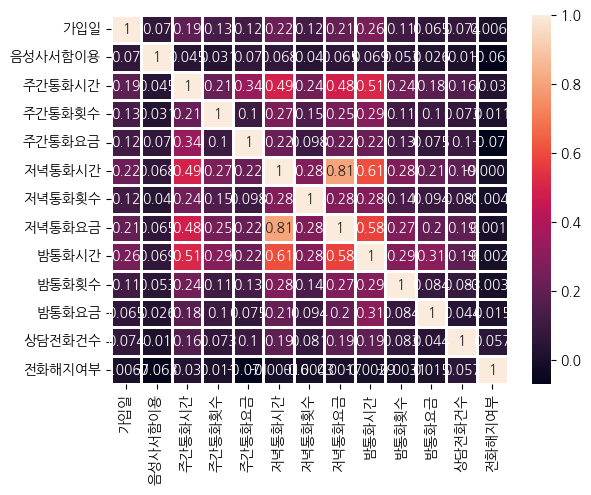

In [34]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, linewidth=1);

In [35]:
corr_matrix['전화해지여부'].sort_values(ascending=False)

전화해지여부     1.000000
상담전화건수     0.057114
주간통화시간     0.029975
밤통화요금      0.014513
주간통화횟수     0.010974
가입일        0.006688
저녁통화요금     0.001711
저녁통화시간    -0.000163
밤통화시간     -0.002872
밤통화횟수     -0.003121
저녁통화횟수    -0.004276
음성사서함이용   -0.062734
주간통화요금    -0.071006
Name: 전화해지여부, dtype: float64

#### X y 나누기

In [117]:
label_name = '전화해지여부'

X = train.drop(columns = label_name)
y = train[label_name]

X.shape, y.shape

((30200, 12), (30200,))

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
display(vif.sort_values(by='VIF Factor', ascending=False))
# vif.sort_values(by='VIF Factor', ascending=False).iloc[5:,1]

,VIF Factor,features
5,41.191943,저녁통화시간
7,32.596202,저녁통화요금
8,25.077348,밤통화시간
2,15.226688,주간통화시간
4,4.647433,주간통화요금
3,3.839621,주간통화횟수
6,3.817328,저녁통화횟수
9,3.794754,밤통화횟수
10,2.922198,밤통화요금
0,2.906115,가입일


In [124]:
len(X.columns)

12

In [125]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
res = smf.ols(formula='전화해지여부 ~ 가입일 + 음성사서함이용 + 주간통화시간 + 주간통화횟수 + 주간통화요금 + 저녁통화시간 + 저녁통화횟수 + 저녁통화요금 + 밤통화시간 + 밤통화횟수 + 밤통화요금 + 상담전화건수',
              data=pd.concat([X , y], axis=1)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 전화해지여부   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     41.54
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           3.27e-98
Time:                        17:42:58   Log-Likelihood:                -7499.2
No. Observations:               30200   AIC:                         1.502e+04
Df Residuals:                   30187   BIC:                         1.513e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1150      0.008     15.059      0.000       0.100       0.130
가입일         3.083e-05   1.51e-05      2.046      0.041     1.3e-06    6.04e-05
음성사서함이용       -0.0007   7.21e-05    -10.214      0.000      -0.001      -0.001
주간통화시간         0.0002   2.67e-05      9.341      0.000       0.000       0.000
주간통화횟수      3.688e-05   1.86e-05      1.987      0.047    4.91e-07    7.33e-05
주간통화요금        -0.0012   8.24e-05    -14.797      0.000      -0.001      -0.001
저녁통화시간     -4.544e-05   4.31e-05     -1.054      0.292      -0.000    3.91e-05
저녁통화횟수     -2.436e-05   1.85e-05     -1.315      0.189   -6.07e-05    1.19e-05
저녁통화요금     -4.197e-05      0.000     -0.110      0.913      -0.001       0.001
밤통화시간         -0.0001    3.4e-05     -3.400      0.001      -0.000    -4.9e-05
밤통화횟수      -5.483e-06   1.86e-05     -0.295      0.768    -4.2e-05     3.1e-05
밤통화요금          0.0006      0.000      2.983      0.003       0.000       0.001
상담전화건수         0.0095      0.001     10.592      0.000       0.008       0.011
==============================================================================
Omnibus:                    13850.725   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50828.134
Skew:                           2.435   Prob(JB):                         0.00
Kurtosis:                       7.083   Cond. No.                     2.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 데이터 분포(histogram) 확인하기

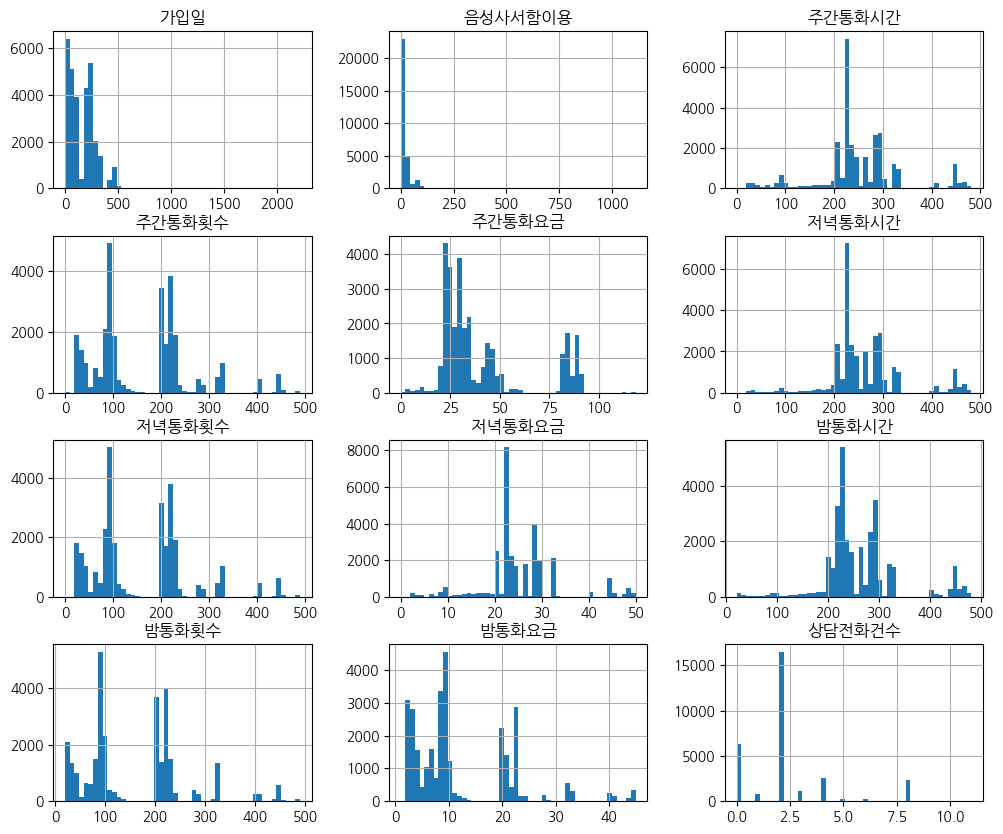

In [8]:
X.hist(bins=50,figsize=(12,10));

#### '음성사서함이용' 과 '가입일' 정규분포 형태로 조정

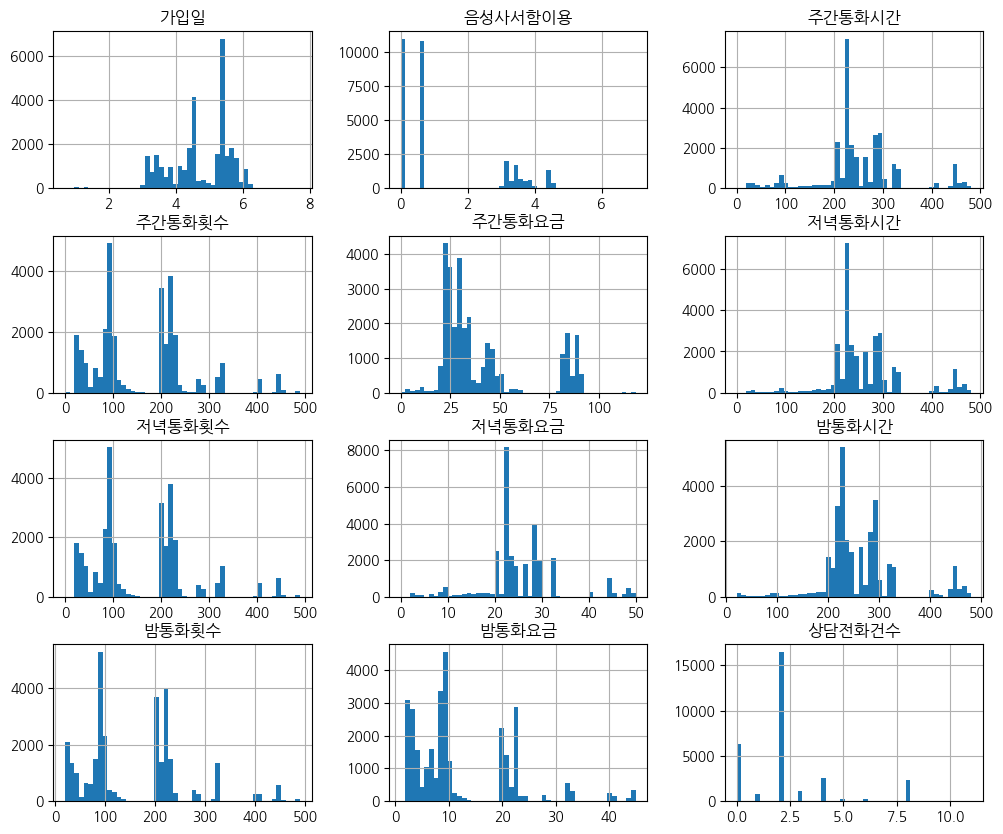

In [9]:
X_log = X.copy()
X_log['음성사서함이용'] = np.log1p(X_log['음성사서함이용'])
X_log['가입일'] = np.log1p(X_log['가입일'])

X_test = test.copy()
X_test['음성사서함이용'] = np.log1p(X_test['음성사서함이용'])
X_test['가입일'] = np.log1p(X_test['가입일'])

X_log.hist(bins=50,figsize=(12,10));

In [15]:
pd.concat([X_log , y], axis=1).columns

Index(['가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '주간통화요금', '저녁통화시간', '저녁통화횟수',
       '저녁통화요금', '밤통화시간', '밤통화횟수', '밤통화요금', '상담전화건수', '전화해지여부'],
      dtype='object')

#### 유전 알고리즘(GA) 이용하여 사용할 변수 선택하기
* ['가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '저녁통화횟수', '저녁통화요금', '밤통화시간','밤통화횟수', '밤통화요금', '상담전화건수']
* drop 할 변수 :  ['저녁통화시간', '주간통화요금']

In [118]:
pip install sklearn-genetic

Note: you may need to restart the kernel to use updated packages.


In [126]:
from genetic_selection import GeneticSelectionCV
import lightgbm

estimator = lightgbm.LGBMClassifier()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=10,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X_log, y)
print('Features:', X_log.columns[model.support_])

Features: Index(['가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '저녁통화횟수', '저녁통화요금', '밤통화시간',
       '밤통화횟수', '밤통화요금', '상담전화건수'],
      dtype='object')


In [128]:
selected_columns = ['가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '저녁통화횟수', '저녁통화요금', '밤통화시간',
       '밤통화횟수', '밤통화요금', '상담전화건수']

drop_col_byGA = list(set(X.columns) - set(selected_columns))

print('drop 할 변수 : ', list(set(X.columns) - set(selected_columns)))

drop 할 변수 :  ['저녁통화시간', '주간통화요금']


#### 통계적으로 유의미한지 확인 (OLS)¶
* 통계적으로 유의미하지 않은 값들(p_val)
** 저녁통화시간 : 0.302
** 저녁통화횟수 : 0.154
** 저녁통화요금 : 0.936
** 밤통화횟수 : 0.835
** 주간통화홧수 : 0.053
> * '횟수' 변수는 없애보자
> * '저녁' 키워드는 '저녁통화요금'만 남기자

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
res = smf.ols(formula='전화해지여부 ~ 가입일 + 음성사서함이용 + 주간통화시간 + 주간통화횟수 + 주간통화요금 + 저녁통화시간 + 저녁통화횟수 + 저녁통화요금 + 밤통화시간 + 밤통화횟수 + 밤통화요금 + 상담전화건수',
              data=pd.concat([X_log , y], axis=1)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 전화해지여부   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     47.11
Date:                Sun, 26 Mar 2023   Prob (F-statistic):          3.29e-112
Time:                        02:15:07   Log-Likelihood:                -7466.3
No. Observations:               30200   AIC:                         1.496e+04
Df Residuals:                   30187   BIC:                         1.507e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1083      0.011      9.648      0.000       0.086       0.130
가입일            0.0049      0.002      2.446      0.014       0.001       0.009
음성사서함이용       -0.0152      0.001    -12.957      0.000      -0.018      -0.013
주간통화시간         0.0002   2.66e-05      9.360      0.000       0.000       0.000
주간통화횟수       3.58e-05   1.85e-05      1.931      0.053    -5.3e-07    7.21e-05
주간통화요금        -0.0012   8.21e-05    -15.020      0.000      -0.001      -0.001
저녁통화시간     -4.441e-05    4.3e-05     -1.032      0.302      -0.000    3.99e-05
저녁통화횟수     -2.639e-05   1.85e-05     -1.427      0.154   -6.26e-05    9.86e-06
저녁통화요금     -3.061e-05      0.000     -0.080      0.936      -0.001       0.001
밤통화시간         -0.0001   3.39e-05     -3.515      0.000      -0.000   -5.26e-05
밤통화횟수      -3.804e-06   1.86e-05     -0.205      0.838   -4.02e-05    3.26e-05
밤통화요금          0.0006      0.000      3.028      0.002       0.000       0.001
상담전화건수         0.0093      0.001     10.362      0.000       0.008       0.011
==============================================================================
Omnibus:                    13795.839   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50412.270
Skew:                           2.426   Prob(JB):                         0.00
Kurtosis:                       7.064   Cond. No.                     3.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Variance Inflation Factor 로 다중공산성 비교하기
* vif 값이 5 이하인 변수만 사용해볼까 생각
** 주간통화요금
** 주간통화횟수
** 저녁통화횟수
** 밤통화횟수
** 밤통화요금
** 상담전화건수
** 음성사서함이용

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_log.values, i) for i in range(X_log.shape[1])]
vif["features"] = X_log.columns
display(vif.sort_values(by='VIF Factor', ascending=False))
vif.sort_values(by='VIF Factor', ascending=False).iloc[5:,1]

,VIF Factor,features
5,42.483340,저녁통화시간
7,32.595165,저녁통화요금
8,26.562201,밤통화시간
2,15.440942,주간통화시간
0,13.975329,가입일
4,4.698181,주간통화요금
3,3.850675,주간통화횟수
6,3.823948,저녁통화횟수
9,3.801117,밤통화횟수
10,2.921699,밤통화요금


4      주간통화요금
3      주간통화횟수
6      저녁통화횟수
9       밤통화횟수
10      밤통화요금
11     상담전화건수
1     음성사서함이용
Name: features, dtype: object

##### vif 값이 5 이하인 변수로 OLS 해보기
* '밤통화횟수' 와 '저녁통화회수' 여전히 통계적으로 유의미하지 않다는 결론
** '밤통화횟수' 와 '저녁통화회수' 제외하고 OLS 구해보자
* '밤통화횟수' 와 '저녁통화회수' 제외하고 OLS 구하기
** 모든 변수가 통계적으로 유의하다는 결론

In [31]:
# vif 값이 5 이하인 변수
vif.sort_values(by='VIF Factor', ascending=False).iloc[5:,1].tolist()

['주간통화요금', '주간통화횟수', '저녁통화횟수', '밤통화횟수', '밤통화요금', '상담전화건수', '음성사서함이용']

In [32]:
res_vif_under_5 = smf.ols(formula='전화해지여부 ~ 주간통화요금 + 주간통화횟수 + 저녁통화횟수 + 밤통화횟수 + 밤통화요금 + 상담전화건수 + 음성사서함이용',
              data=pd.concat([X_log , y], axis=1)).fit()
res_vif_under_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 전화해지여부   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     66.82
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           4.03e-96
Time:                        02:31:03   Log-Likelihood:                -7514.4
No. Observations:               30200   AIC:                         1.504e+04
Df Residuals:                   30192   BIC:                         1.511e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1376      0.006     23.852      0.000       0.126       0.149
주간통화요금        -0.0010   7.86e-05    -13.299      0.000      -0.001      -0.001
주간통화횟수      4.222e-05    1.8e-05      2.348      0.019    6.97e-06    7.75e-05
저녁통화횟수     -1.396e-05   1.79e-05     -0.779      0.436   -4.91e-05    2.12e-05
밤통화횟수       6.271e-06    1.8e-05      0.349      0.727    -2.9e-05    4.15e-05
밤통화요금          0.0006      0.000      3.060      0.002       0.000       0.001
상담전화건수         0.0095      0.001     10.800      0.000       0.008       0.011
음성사서함이용       -0.0153      0.001    -13.016      0.000      -0.018      -0.013
==============================================================================
Omnibus:                    13869.257   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50998.951
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                       7.093   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
res_vif_removed = smf.ols(formula='전화해지여부 ~ 주간통화요금 + 주간통화횟수 + 밤통화요금 + 상담전화건수 + 음성사서함이용',
              data=pd.concat([X_log , y], axis=1)).fit()
res_vif_removed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 전화해지여부   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     93.41
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           6.00e-98
Time:                        02:35:12   Log-Likelihood:                -7514.7
No. Observations:               30200   AIC:                         1.504e+04
Df Residuals:                   30194   BIC:                         1.509e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1368      0.005     26.447      0.000       0.127       0.147
주간통화요금        -0.0010    7.8e-05    -13.420      0.000      -0.001      -0.001
주간통화횟수      4.097e-05   1.78e-05      2.303      0.021    6.11e-06    7.58e-05
밤통화요금          0.0006      0.000      3.039      0.002       0.000       0.001
상담전화건수         0.0095      0.001     10.814      0.000       0.008       0.011
음성사서함이용       -0.0153      0.001    -13.021      0.000      -0.018      -0.013
==============================================================================
Omnibus:                    13869.878   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51003.860
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                       7.093   Cond. No.                         560.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 예측해보기

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_log, y, test_size=0.2, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((24160, 12), (6040, 12), (24160,), (6040,))

In [38]:
col = ['주간통화요금', '주간통화횟수', '밤통화요금', '상담전화건수', '음성사서함이용']

In [39]:
X_train_selected = X_train[col]
display(X_train_selected.head(2))
X_valid_selected = X_valid[col]
display(X_valid_selected.head(2))

,주간통화요금,주간통화횟수,밤통화요금,상담전화건수,음성사서함이용
ID,,,,,
TRAIN_26587,49.9,42,4.40,0,0.693147
TRAIN_29946,36.7,63,2.23,2,0.693147


,주간통화요금,주간통화횟수,밤통화요금,상담전화건수,음성사서함이용
ID,,,,,
TRAIN_03068,31.6,281,20.08,8,0.693147
TRAIN_30027,24.1,223,2.33,3,0.693147


In [40]:
import lightgbm

model_lgbm  = lightgbm.LGBMClassifier()
model_lgbm 

LGBMClassifier()

In [46]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"n_estimators": list(range(100,1000)),
                       "learning_rate": np.random.uniform(low=0.01, high=0.3, size=1000)
                      }
reg = RandomizedSearchCV(model_lgbm, 
                         param_distributions=param_distributions, 
                         n_iter=10,
                         scoring='f1',
                         cv=5, verbose=1, n_jobs=-1,
                         random_state=42)

reg.fit(X_train_selected, y_train)
reg.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


LGBMClassifier(learning_rate=0.20059954066388008, n_estimators=978)

In [47]:
from sklearn.model_selection import GridSearchCV

param_distributions = {"n_estimators": [550,650,750,850,950,1000],
                       "learning_rate": np.random.uniform(low=0.1, high=0.3, size=30)
                      }
reg_grid = GridSearchCV(model_lgbm, 
                         param_grid=param_distributions,
                         scoring='f1',
                         cv=3, verbose=1, n_jobs=-1)

reg_grid.fit(X_train, y_train)

reg_grid.best_estimator_

Fitting 3 folds for each of 180 candidates, totalling 540 fits


LGBMClassifier(learning_rate=0.25981629607654794, n_estimators=1000)

In [56]:
model_lgbm  = lightgbm.LGBMClassifier(learning_rate=0.3, n_estimators=1000)
model_lgbm 

LGBMClassifier(learning_rate=0.3, n_estimators=1000)

In [57]:
model_lgbm.fit(X_train_selected, y_train)

LGBMClassifier(learning_rate=0.3, n_estimators=1000)

<AxesSubplot:>

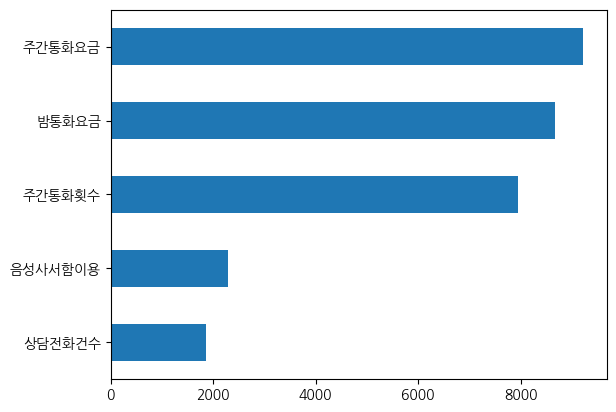

In [59]:
lgbm_fi = pd.Series(model_lgbm.feature_importances_)
lgbm_fi.index = model_lgbm.feature_name_
lgbm_fi.nlargest(20).sort_values().plot.barh()

In [58]:
# 1
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_cross_val_pred = cross_val_predict(model_lgbm, X_train_selected, y_train, n_jobs=-1, verbose=1,cv=3)
# y_cross_val_pred[:5]

cross_val_accuracy = accuracy_score(y_cross_val_pred, y_train) 
cross_val_f1_macro = f1_score(y_cross_val_pred, y_train, average='macro')
print('cross_val_accuracy : ',cross_val_accuracy, ' cross_val_f1 : ', cross_val_f1_macro)

# 2
model_lgbm.fit(X_train_selected, y_train)

y_valid_pred = model_lgbm.predict(X_valid_selected)
# y_valid_pred[:5]

valid_pred_accuracy = accuracy_score(y_valid_pred, y_valid) 
valid_pred_f1_macro = f1_score(y_valid_pred, y_valid, average='macro')
print('valid_pred_accuracy : ',valid_pred_accuracy, 'valid_pred_f1 : ',valid_pred_f1_macro)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished


cross_val_accuracy :  0.8966887417218543  cross_val_f1 :  0.6733032364321292
valid_pred_accuracy :  0.9031456953642384 valid_pred_f1 :  0.6813909080359121


### 다시 조정해보기

#### '저녁' 키워드 중 '저녁통화요금'만 남기고 '횟수' 키워드는 전부 삭제
* w지울 column : ['저녁통화시간', '저녁통화횟수', '주간통화횟수', '밤통화횟수']

In [66]:
drop_col = ['저녁통화시간', '저녁통화횟수', '주간통화횟수', '밤통화횟수']
X_log_dropped = X_log.copy()
X_log_dropped = X_log_dropped.drop(columns = drop_col)
X_log_dropped.columns

Index(['가입일', '음성사서함이용', '주간통화시간', '주간통화요금', '저녁통화요금', '밤통화시간', '밤통화요금',
       '상담전화건수'],
      dtype='object')

##### VIF 구해보기

In [67]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_log_dropped.values, i) for i in range(X_log_dropped.shape[1])]
vif["features"] = X_log_dropped.columns
display(vif.sort_values(by='VIF Factor', ascending=False))

,VIF Factor,features
5,23.909595,밤통화시간
4,17.339856,저녁통화요금
2,15.018682,주간통화시간
0,13.350050,가입일
3,4.688060,주간통화요금
6,2.920147,밤통화요금
7,2.362838,상담전화건수
1,1.668996,음성사서함이용


##### ols 구해보기

In [70]:
res_dropped = smf.ols(formula='전화해지여부 ~ 가입일 + 음성사서함이용 + 주간통화시간 + 주간통화요금 + 저녁통화요금 + 밤통화시간 + 밤통화요금 + 상담전화건수',
              data=pd.concat([X_log_dropped , y], axis=1)).fit()
res_dropped.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 전화해지여부   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     69.84
Date:                Sun, 26 Mar 2023   Prob (F-statistic):          2.10e-114
Time:                        04:40:34   Log-Likelihood:                -7469.6
No. Observations:               30200   AIC:                         1.496e+04
Df Residuals:                   30191   BIC:                         1.503e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1066      0.011      9.627      0.000       0.085       0.128
가입일            0.0049      0.002      2.465      0.014       0.001       0.009
음성사서함이용       -0.0153      0.001    -12.982      0.000      -0.018      -0.013
주간통화시간         0.0002   2.63e-05      9.321      0.000       0.000       0.000
주간통화요금        -0.0012   8.21e-05    -15.030      0.000      -0.001      -0.001
저녁통화요금        -0.0003      0.000     -1.097      0.272      -0.001       0.000
밤통화시간         -0.0001   3.24e-05     -3.809      0.000      -0.000   -5.99e-05
밤통화요금          0.0006      0.000      3.035      0.002       0.000       0.001
상담전화건수         0.0092      0.001     10.329      0.000       0.007       0.011
==============================================================================
Omnibus:                    13800.564   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50448.757
Skew:                           2.427   Prob(JB):                         0.00
Kurtosis:                       7.066   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### 예측해보기

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_log_dropped, y, test_size=0.2, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((24160, 8), (6040, 8), (24160,), (6040,))

In [72]:
model_lgbm  = lightgbm.LGBMClassifier()
model_lgbm 

LGBMClassifier()

In [74]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"n_estimators": list(range(100,1000)),
                       "learning_rate": np.random.uniform(low=0.01, high=0.3, size=1000)
                      }
reg = RandomizedSearchCV(model_lgbm, 
                         param_distributions=param_distributions, 
                         n_iter=10,
                         scoring='f1',
                         cv=5, verbose=1, n_jobs=-1,
                         random_state=42)

reg.fit(X_train, y_train)
reg.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


LGBMClassifier(learning_rate=0.2982488646502258, n_estimators=767)

In [75]:
from sklearn.model_selection import GridSearchCV

param_distributions = {"n_estimators": [550,650,750,850,950,1000],
                       "learning_rate": np.random.uniform(low=0.1, high=0.3, size=30)
                      }
reg_grid = GridSearchCV(model_lgbm, 
                         param_grid=param_distributions,
                         scoring='f1',
                         cv=3, verbose=1, n_jobs=-1)

reg_grid.fit(X_train, y_train)

reg_grid.best_estimator_

Fitting 3 folds for each of 180 candidates, totalling 540 fits


LGBMClassifier(learning_rate=0.29021588688107297, n_estimators=1000)

In [76]:
model_lgbm  = lightgbm.LGBMClassifier(learning_rate=0.29021588688107297, n_estimators=1000)
model_lgbm 

LGBMClassifier(learning_rate=0.29021588688107297, n_estimators=1000)

In [77]:
model_lgbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.29021588688107297, n_estimators=1000)

<AxesSubplot:>

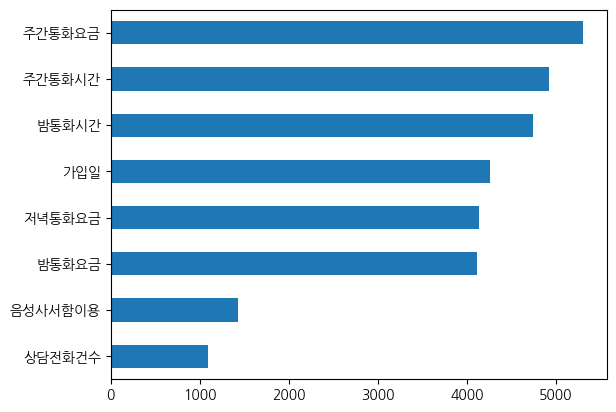

In [78]:
lgbm_fi = pd.Series(model_lgbm.feature_importances_)
lgbm_fi.index = model_lgbm.feature_name_
lgbm_fi.nlargest(20).sort_values().plot.barh()

In [79]:
# 1 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_cross_val_pred = cross_val_predict(model_lgbm, X_train, y_train, n_jobs=-1, verbose=1,cv=3)
# y_cross_val_pred[:5]

cross_val_accuracy = accuracy_score(y_cross_val_pred, y_train) 
cross_val_f1_macro = f1_score(y_cross_val_pred, y_train, average='macro')
print('cross_val_accuracy : ',cross_val_accuracy, ' cross_val_f1 : ', cross_val_f1_macro)

# 2
model_lgbm.fit(X_train_selected, y_train)

y_valid_pred = model_lgbm.predict(X_valid_selected)
# y_valid_pred[:5]

valid_pred_accuracy = accuracy_score(y_valid_pred, y_valid) 
valid_pred_f1_macro = f1_score(y_valid_pred, y_valid, average='macro')
print('valid_pred_accuracy : ',valid_pred_accuracy, 'valid_pred_f1 : ',valid_pred_f1_macro)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.8s finished


cross_val_accuracy :  0.9117963576158941  cross_val_f1 :  0.7210170113430069
valid_pred_accuracy :  0.9038079470198676 valid_pred_f1 :  0.6847150253248431


#### '음성사서함이용' , '상담전화건수', '밤통화시간' 추가로 지워보기
* 지울 column : ['저녁통화시간', '저녁통화횟수', '주간통화횟수', '밤통화횟수','밤통화시간', '음성사서함이용' , '상담전화건수']

In [97]:
drop_col = ['저녁통화시간', '저녁통화횟수', '주간통화횟수', '밤통화횟수', '밤통화시간', '음성사서함이용' , '상담전화건수']
X_log_dropped = X_log.copy()
X_log_dropped = X_log_dropped.drop(columns = drop_col)
X_log_dropped.columns

Index(['가입일', '주간통화시간', '주간통화요금', '저녁통화요금', '밤통화요금'], dtype='object')

##### VIF 구해보기

In [98]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_log_dropped.values, i) for i in range(X_log_dropped.shape[1])]
vif["features"] = X_log_dropped.columns
display(vif.sort_values(by='VIF Factor', ascending=False))

,VIF Factor,features
3,13.657944,저녁통화요금
1,13.492422,주간통화시간
0,11.286024,가입일
2,4.663734,주간통화요금
4,2.766953,밤통화요금


##### ols 구해보기

In [100]:
res_dropped = smf.ols(formula='전화해지여부 ~ 가입일 + 주간통화시간 + 주간통화요금 + 저녁통화요금 + 밤통화요금',
              data=pd.concat([X_log_dropped , y], axis=1)).fit()
res_dropped.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 전화해지여부   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     52.89
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           7.58e-55
Time:                        05:08:48   Log-Likelihood:                -7614.8
No. Observations:               30200   AIC:                         1.524e+04
Df Residuals:                   30194   BIC:                         1.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0901      0.011      8.276      0.000       0.069       0.111
가입일            0.0041      0.002      2.042      0.041       0.000       0.008
주간통화시간         0.0002   2.53e-05      9.301      0.000       0.000       0.000
주간통화요금        -0.0012   8.23e-05    -14.976      0.000      -0.001      -0.001
저녁통화요금        -0.0005      0.000     -2.003      0.045      -0.001    -1.1e-05
밤통화요금          0.0004      0.000      2.107      0.035    2.86e-05       0.001
==============================================================================
Omnibus:                    14006.167   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52066.981
Skew:                           2.461   Prob(JB):                         0.00
Kurtosis:                       7.141   Cond. No.                     1.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### 예측해보기

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_log_dropped, y, test_size=0.2, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((24160, 5), (6040, 5), (24160,), (6040,))

In [102]:
model_lgbm  = lightgbm.LGBMClassifier()
model_lgbm 

LGBMClassifier()

In [103]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"n_estimators": list(range(100,1000)),
                       "learning_rate": np.random.uniform(low=0.01, high=0.3, size=1000)
                      }
reg = RandomizedSearchCV(model_lgbm, 
                         param_distributions=param_distributions, 
                         n_iter=10,
                         scoring='f1',
                         cv=5, verbose=1, n_jobs=-1,
                         random_state=42)

reg.fit(X_train, y_train)
reg.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


LGBMClassifier(learning_rate=0.2318702183811317, n_estimators=986)

In [104]:
from sklearn.model_selection import GridSearchCV

param_distributions = {"n_estimators": [550,650,750,850,950,1000],
                       "learning_rate": np.random.uniform(low=0.1, high=0.3, size=30)
                      }
reg_grid = GridSearchCV(model_lgbm, 
                         param_grid=param_distributions,
                         scoring='f1',
                         cv=3, verbose=1, n_jobs=-1)

reg_grid.fit(X_train, y_train)

reg_grid.best_estimator_

Fitting 3 folds for each of 180 candidates, totalling 540 fits


LGBMClassifier(learning_rate=0.29392022790458083, n_estimators=950)

In [105]:
model_lgbm  = lightgbm.LGBMClassifier(learning_rate=0.29392022790458083, n_estimators=950)
model_lgbm 

LGBMClassifier(learning_rate=0.29392022790458083, n_estimators=950)

In [106]:
model_lgbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.29392022790458083, n_estimators=950)

<AxesSubplot:>

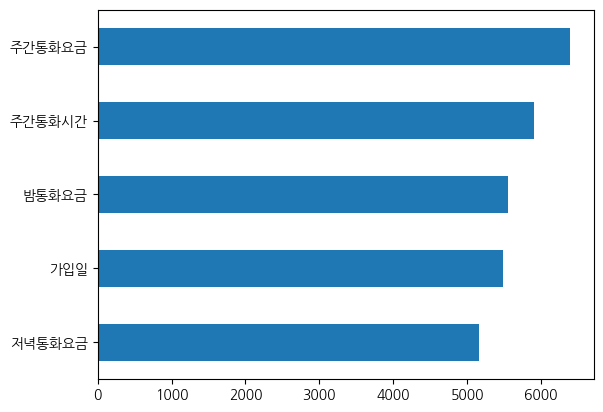

In [107]:
lgbm_fi = pd.Series(model_lgbm.feature_importances_)
lgbm_fi.index = model_lgbm.feature_name_
lgbm_fi.nlargest(20).sort_values().plot.barh()

In [108]:
# 1 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_cross_val_pred = cross_val_predict(model_lgbm, X_train, y_train, n_jobs=-1, verbose=1,cv=3)
# y_cross_val_pred[:5]

cross_val_accuracy = accuracy_score(y_cross_val_pred, y_train) 
cross_val_f1_macro = f1_score(y_cross_val_pred, y_train, average='macro')
print('cross_val_accuracy : ',cross_val_accuracy, ' cross_val_f1 : ', cross_val_f1_macro)

# 2
model_lgbm.fit(X_train_selected, y_train)

y_valid_pred = model_lgbm.predict(X_valid_selected)
# y_valid_pred[:5]

valid_pred_accuracy = accuracy_score(y_valid_pred, y_valid) 
valid_pred_f1_macro = f1_score(y_valid_pred, y_valid, average='macro')
print('valid_pred_accuracy : ',valid_pred_accuracy, 'valid_pred_f1 : ',valid_pred_f1_macro)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished


cross_val_accuracy :  0.905091059602649  cross_val_f1 :  0.698239498545395
valid_pred_accuracy :  0.9081125827814569 valid_pred_f1 :  0.7009866583961228


#### GA로 선택한 변수로 예측해보기
* drop 할 변수 :  ['저녁통화시간', '주간통화요금']

In [492]:
X_dropped_byGA = X_log.copy()
X_dropped_byGA = X_dropped_byGA.drop(columns = drop_col_byGA)
X_dropped_byGA.columns

Index(['가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '저녁통화횟수', '저녁통화요금', '밤통화시간',
       '밤통화횟수', '밤통화요금', '상담전화건수'],
      dtype='object')

##### VIF 구해보기

In [493]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_dropped_byGA.values, i) for i in range(X_dropped_byGA.shape[1])]
vif["features"] = X_dropped_byGA.columns
display(vif.sort_values(by='VIF Factor', ascending=False))

,VIF Factor,features
6,25.135459,밤통화시간
5,17.894597,저녁통화요금
2,14.258519,주간통화시간
0,13.334463,가입일
3,3.835604,주간통화횟수
4,3.815360,저녁통화횟수
7,3.787919,밤통화횟수
8,2.920869,밤통화요금
9,2.358837,상담전화건수
1,1.668799,음성사서함이용


In [494]:
 X_dropped_byGA.columns
    

Index(['가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '저녁통화횟수', '저녁통화요금', '밤통화시간',
       '밤통화횟수', '밤통화요금', '상담전화건수'],
      dtype='object')

##### ols 구해보기

In [495]:
res_dropped = smf.ols(formula='전화해지여부 ~ 가입일 + 음성사서함이용 + 주간통화시간 + 주간통화횟수 + 저녁통화횟수 + 저녁통화요금 + 밤통화시간 + 밤통화횟수 + 밤통화요금 + 상담전화건수',
              data=pd.concat([X_dropped_byGA , y], axis=1)).fit()
res_dropped.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 전화해지여부   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     33.57
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.04e-65
Time:                        02:59:13   Log-Likelihood:                -7579.5
No. Observations:               30200   AIC:                         1.518e+04
Df Residuals:                   30189   BIC:                         1.527e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0941      0.011      8.481      0.000       0.072       0.116
가입일            0.0040      0.002      1.995      0.046       7e-05       0.008
음성사서함이용       -0.0157      0.001    -13.313      0.000      -0.018      -0.013
주간통화시간         0.0002   2.58e-05      5.823      0.000    9.97e-05       0.000
주간통화횟수      3.104e-05   1.86e-05      1.671      0.095   -5.37e-06    6.74e-05
저녁통화횟수      -2.71e-05   1.85e-05     -1.461      0.144   -6.35e-05    9.26e-06
저녁통화요금        -0.0004      0.000     -1.529      0.126      -0.001       0.000
밤통화시간         -0.0001   3.33e-05     -4.072      0.000      -0.000   -7.03e-05
밤통화횟수      -1.395e-05   1.86e-05     -0.749      0.454   -5.05e-05    2.26e-05
밤통화요금          0.0006      0.000      2.976      0.003       0.000       0.001
상담전화건수         0.0087      0.001      9.671      0.000       0.007       0.010
==============================================================================
Omnibus:                    13958.811   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51711.264
Skew:                           2.453   Prob(JB):                         0.00
Kurtosis:                       7.127   Cond. No.                     2.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### 예측해보기

In [496]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_dropped_byGA, y, test_size=0.2, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((24160, 10), (6040, 10), (24160,), (6040,))

In [684]:
model_lgbm  = lightgbm.LGBMClassifier()
model_lgbm 

LGBMClassifier()

In [139]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"n_estimators": list(range(100,1000)),
                       "learning_rate": np.random.uniform(low=0.01, high=0.3, size=1000)
                      }
reg = RandomizedSearchCV(model_lgbm, 
                         param_distributions=param_distributions, 
                         n_iter=10,
                         scoring='f1',
                         cv=5, verbose=1, n_jobs=-1,
                         random_state=42)

reg.fit(X_train, y_train)
reg.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


LGBMClassifier(learning_rate=0.2635627619206155, n_estimators=986)

In [140]:
from sklearn.model_selection import GridSearchCV

param_distributions = {"n_estimators": [550,650,750,850,950,1000],
                       "learning_rate": np.random.uniform(low=0.1, high=0.3, size=30)
                      }
reg_grid = GridSearchCV(model_lgbm, 
                         param_grid=param_distributions,
                         scoring='f1',
                         cv=3, verbose=1, n_jobs=-1)

reg_grid.fit(X_train, y_train)

reg_grid.best_estimator_

Fitting 3 folds for each of 180 candidates, totalling 540 fits


LGBMClassifier(learning_rate=0.2641718029121834, n_estimators=850)

In [694]:
model_lgbm  = lightgbm.LGBMClassifier(learning_rate=0.2895, n_estimators=775)
model_lgbm 

LGBMClassifier(learning_rate=0.2895, n_estimators=775)

In [695]:
model_lgbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.2895, n_estimators=775)

<AxesSubplot:>

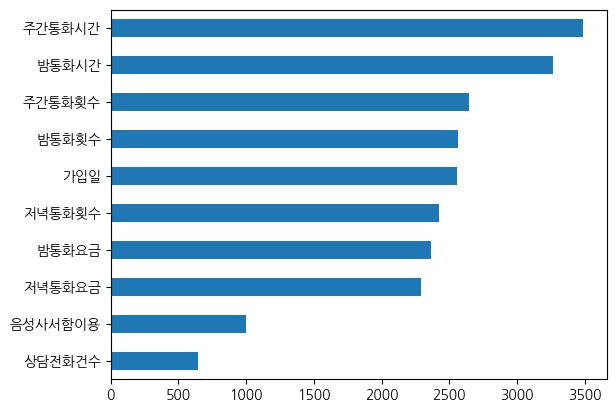

In [696]:
lgbm_fi = pd.Series(model_lgbm.feature_importances_)
lgbm_fi.index = model_lgbm.feature_name_
lgbm_fi.nlargest(20).sort_values().plot.barh()

In [697]:
# 1 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_cross_val_pred = cross_val_predict(model_lgbm, X_train, y_train, n_jobs=-1, verbose=1,cv=3)
# y_cross_val_pred[:5]

cross_val_accuracy = accuracy_score(y_cross_val_pred, y_train) 
cross_val_f1_macro = f1_score(y_cross_val_pred, y_train, average='macro')
print('cross_val_accuracy : ',cross_val_accuracy, ' cross_val_f1 : ', cross_val_f1_macro)

# 2
model_lgbm.fit(X_train, y_train)

y_valid_pred = model_lgbm.predict(X_valid)
# y_valid_pred[:5]

valid_pred_accuracy = accuracy_score(y_valid_pred, y_valid) 
valid_pred_f1_macro = f1_score(y_valid_pred, y_valid, average='macro')
print('valid_pred_accuracy : ',valid_pred_accuracy, 'valid_pred_f1 : ',valid_pred_f1_macro)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished


cross_val_accuracy :  0.9151076158940398  cross_val_f1 :  0.7370560805322373
valid_pred_accuracy :  0.9274834437086092 valid_pred_f1 :  0.7773131313131313


In [698]:
pred_score =0.7773131313131313

In [699]:
X_test_dropped = X_test.drop(columns = drop_col_byGA)
X_test_dropped.shape

(12943, 10)

In [700]:
y_pred = model_lgbm.predict(X_test_dropped)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [701]:
file_name_ = f'data/전화해지여부_{pred_score:.5f}.csv'
file_name_

'data/전화해지여부_0.77731.csv'

In [702]:
submission[label_name] = y_pred
submission.to_csv(file_name_,index=False)
pd.read_csv(file_name_)

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0
...,...,...
12938,TEST_12938,0
12939,TEST_12939,0
12940,TEST_12940,0
12941,TEST_12941,0


##### 최적의 파라미터 찾아보기

In [630]:
np.random.uniform(low=0.01, high=0.3, size=30)

array([0.19942651, 0.19765028, 0.05014996, 0.24250222, 0.28514616,
       0.03768209, 0.21561114, 0.1717761 , 0.28947188, 0.11753339,
       0.18504195, 0.02255493, 0.10592515, 0.16656294, 0.0321877 ,
       0.12962176, 0.25472249, 0.2938214 , 0.16352378, 0.04028088,
       0.23959246, 0.01006313, 0.07557841, 0.23345523, 0.09524214,
       0.13862126, 0.10237281, 0.08488485, 0.1490052 , 0.13411863])

In [629]:
from scipy.stats import randint as sp_randint
sp_randint(50, 500)

In [679]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

model_lgbm  = lightgbm.LGBMClassifier()
model_lgbm 

# 파라미터 그리드 설정
params = {
    'learning_rate': np.random.uniform(low=0.01, high=0.3, size=50),
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': sp_randint(3, 20),
    'num_leaves': sp_randint(20, 200),
    'min_child_samples': sp_randint(5, 50),
    'reg_alpha': [0, 0.1, 0.5, 1, 2, 5],
    'reg_lambda': [0, 0.1, 0.5, 1, 2, 5],
    'colsample_bytree': [0.5, 0.7, 0.9, 1],
    'subsample': [0.5, 0.7, 0.9, 1],
    'random_state': [42]
}

# 모델 생성
model = LGBMClassifier()

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=params, 
    n_iter=100,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    random_state=42
)

# 모델 학습 및 검증
random_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print(random_search.best_params_)


{'colsample_bytree': 0.7, 'learning_rate': 0.1974986433809394, 'max_depth': 11, 'min_child_samples': 16, 'n_estimators': 500, 'num_leaves': 148, 'random_state': 42, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.5}


In [681]:
model_lgbm  = lightgbm.LGBMClassifier(colsample_bytree= 0.7, learning_rate= 0.1974986433809394, max_depth= 11, min_child_samples= 16, n_estimators= 500, num_leaves= 148, random_state= 42, reg_alpha= 0.1, reg_lambda= 0.1, subsample= 0.5)
model_lgbm 

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.1974986433809394,
               max_depth=11, min_child_samples=16, n_estimators=500,
               num_leaves=148, random_state=42, reg_alpha=0.1, reg_lambda=0.1,
               subsample=0.5)

In [682]:
model_lgbm.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.1974986433809394,
               max_depth=11, min_child_samples=16, n_estimators=500,
               num_leaves=148, random_state=42, reg_alpha=0.1, reg_lambda=0.1,
               subsample=0.5)

In [683]:
# 1 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_cross_val_pred = cross_val_predict(model_lgbm, X_train, y_train, n_jobs=-1, verbose=1,cv=3)
# y_cross_val_pred[:5]

cross_val_accuracy = accuracy_score(y_cross_val_pred, y_train) 
cross_val_f1_macro = f1_score(y_cross_val_pred, y_train, average='macro')
print('cross_val_accuracy : ',cross_val_accuracy, ' cross_val_f1 : ', cross_val_f1_macro)

# 2
model_lgbm.fit(X_train, y_train)

y_valid_pred = model_lgbm.predict(X_valid)
# y_valid_pred[:5]

valid_pred_accuracy = accuracy_score(y_valid_pred, y_valid) 
valid_pred_f1_macro = f1_score(y_valid_pred, y_valid, average='macro')
print('valid_pred_accuracy : ',valid_pred_accuracy, 'valid_pred_f1 : ',valid_pred_f1_macro)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s finished


cross_val_accuracy :  0.9155629139072847  cross_val_f1 :  0.7384111163047029
valid_pred_accuracy :  0.927317880794702 valid_pred_f1 :  0.7731995604541859


In [678]:
valid_pred_accuracy : 0.9274834437086092 valid_pred_f1 : 0.7773131313131313

SyntaxError: invalid syntax (860154233.py, line 1)

##### 경우의 수 나눠서 진행
건드리지 않은 것
>  valid_pred_accuracy :  0.9274834437086092 valid_pred_f1 :  0.7773131313131313
1. '밤통화시간' 과 '주간통화시간'의 VIF가 높았으므로 둘을 합쳐주고 예측해보기
> valid_pred_accuracy :  0.9230132450331126 valid_pred_f1 :  0.7597671881804019
2. 1에다가 '음성사서함이용' 변수 지워보기
> * learning_rate=0.289, n_estimators=1000
> * valid_pred_accuracy :  0.9248344370860927 valid_pred_f1 :  0.7710879782287484
3. 1에다가 '상담전화건수' 변수 지워보기
> * learning_rate=0.28158111403441993, n_estimators=1000
> * valid_pred_accuracy :  0.9211920529801324 valid_pred_f1 :  0.7504648666363931
4. 둘 다 지워보기
> * learning_rate=0.3, n_estimators=1000
> * valid_pred_accuracy :  0.9238410596026491 valid_pred_f1 :  0.7661279461279462
5. 4에 가입일도 지워보기
> * lightgbm.LGBMClassifier(learning_rate=0.29, n_estimators=1000)
> * valid_pred_accuracy :  0.921523178807947 valid_pred_f1 :  0.7561554780526644
6. '밤통화시간' 과 '주간통화시간' 그대로 나두고 '음성사서함이용' 변수만 지워보기
> * learning_rate=0.29, n_estimators=1000
> * valid_pred_accuracy :  0.9251655629139073 valid_pred_f1 :  0.7717190041955646
7. 6에 '가입일' 지워보기
> * learning_rate=0.289, n_estimators=1000
> * valid_pred_accuracy :  0.9254966887417219 valid_pred_f1 :  0.7677144641588032

In [436]:
X_dropped_byGA = X_log.copy()
X_dropped_byGA = X_dropped_byGA.drop(columns = drop_col_byGA)
# X_dropped_byGA['밤주간통화시간'] = X_dropped_byGA['밤통화시간'] + X_dropped_byGA['주간통화시간']
X_dropped_byGA = X_dropped_byGA.drop(columns = ['음성사서함이용', '가입일'])
X_dropped_byGA.columns

Index(['주간통화시간', '주간통화횟수', '저녁통화횟수', '저녁통화요금', '밤통화시간', '밤통화횟수', '밤통화요금',
       '상담전화건수'],
      dtype='object')

In [437]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_dropped_byGA.values, i) for i in range(X_dropped_byGA.shape[1])]
vif["features"] = X_dropped_byGA.columns
display(vif.sort_values(by='VIF Factor', ascending=False))

,VIF Factor,features
4,22.362994,밤통화시간
3,17.388841,저녁통화요금
0,13.752422,주간통화시간
1,3.807417,주간통화횟수
2,3.798721,저녁통화횟수
5,3.770012,밤통화횟수
6,2.920008,밤통화요금
7,2.350081,상담전화건수


In [439]:
res_dropped = smf.ols(formula='전화해지여부 ~  주간통화횟수 + 저녁통화횟수 + 저녁통화요금 + 밤통화횟수 + 밤통화요금 + 상담전화건수 + 밤통화시간 + 주간통화시간',
              data=pd.concat([X_dropped_byGA , y], axis=1)).fit()
res_dropped.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 전화해지여부   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     19.31
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           2.69e-29
Time:                        02:00:57   Log-Likelihood:                -7669.4
No. Observations:               30200   AIC:                         1.536e+04
Df Residuals:                   30191   BIC:                         1.543e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0943      0.007     12.792      0.000       0.080       0.109
주간통화횟수      3.221e-05   1.86e-05      1.730      0.084   -4.28e-06    6.87e-05
저녁통화횟수     -2.697e-05   1.86e-05     -1.450      0.147   -6.34e-05    9.48e-06
저녁통화요금        -0.0005      0.000     -1.734      0.083      -0.001    6.46e-05
밤통화횟수      -2.064e-05   1.87e-05     -1.106      0.269   -5.72e-05     1.6e-05
밤통화요금          0.0006      0.000      2.852      0.004       0.000       0.001
상담전화건수         0.0090      0.001      9.992      0.000       0.007       0.011
밤통화시간         -0.0001   3.32e-05     -4.028      0.000      -0.000   -6.87e-05
주간통화시간         0.0002   2.59e-05      5.930      0.000       0.000       0.000
==============================================================================
Omnibus:                    14102.817   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52902.124
Skew:                           2.476   Prob(JB):                         0.00
Kurtosis:                       7.185   Cond. No.                     1.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [440]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_dropped_byGA, y, test_size=0.2, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((24160, 8), (6040, 8), (24160,), (6040,))

In [441]:
model_lgbm  = lightgbm.LGBMClassifier()
model_lgbm 

LGBMClassifier()

In [442]:
from sklearn.model_selection import GridSearchCV

param_distributions = {"n_estimators": [550,650,750,850,950,1000],
                       "learning_rate": np.random.uniform(low=0.1, high=0.3, size=30)
                      }
reg_grid = GridSearchCV(model_lgbm, 
                         param_grid=param_distributions,
                         scoring='f1',
                         cv=3, verbose=1, n_jobs=-1)

reg_grid.fit(X_train, y_train)

reg_grid.best_estimator_

Fitting 3 folds for each of 180 candidates, totalling 540 fits


LGBMClassifier(learning_rate=0.2890658047231487, n_estimators=850)

In [476]:
model_lgbm  = lightgbm.LGBMClassifier(learning_rate=0.289, n_estimators=1000)
# 0.7692479045111859
model_lgbm 

LGBMClassifier(learning_rate=0.289, n_estimators=1000)

In [477]:
model_lgbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.289, n_estimators=1000)

<AxesSubplot:>

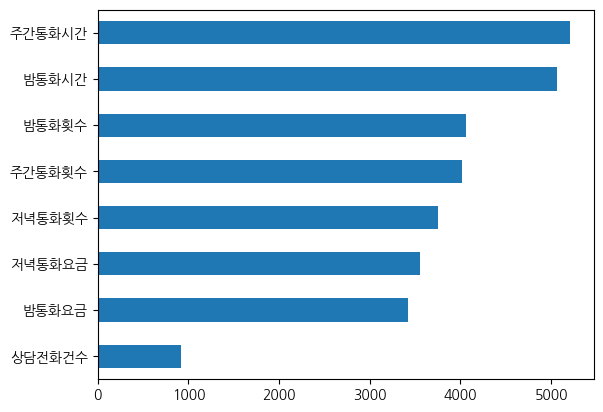

In [478]:
lgbm_fi = pd.Series(model_lgbm.feature_importances_)
lgbm_fi.index = model_lgbm.feature_name_
lgbm_fi.nlargest(20).sort_values().plot.barh()

In [479]:
# 1 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_cross_val_pred = cross_val_predict(model_lgbm, X_train, y_train, n_jobs=-1, verbose=1,cv=3)
# y_cross_val_pred[:5]

cross_val_accuracy = accuracy_score(y_cross_val_pred, y_train) 
cross_val_f1_macro = f1_score(y_cross_val_pred, y_train, average='macro')
print('cross_val_accuracy : ',cross_val_accuracy, ' cross_val_f1 : ', cross_val_f1_macro)

# 2
model_lgbm.fit(X_train, y_train)

y_valid_pred = model_lgbm.predict(X_valid)
# y_valid_pred[:5]

valid_pred_accuracy = accuracy_score(y_valid_pred, y_valid) 
valid_pred_f1_macro = f1_score(y_valid_pred, y_valid, average='macro')
print('valid_pred_accuracy : ',valid_pred_accuracy, 'valid_pred_f1 : ',valid_pred_f1_macro)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.8s finished


cross_val_accuracy :  0.9120033112582782  cross_val_f1 :  0.7256449726675643
valid_pred_accuracy :  0.9254966887417219 valid_pred_f1 :  0.7677144641588032


In [480]:
0.7677144641588032

0.7677144641588032

#### '밤통화시간' 과 '주간통화시간' 그대로 나두고 '음성사서함이용' 변수만 지우고 예측까지 해보기

In [481]:
X_dropped_byGA = X_log.copy()
X_dropped_byGA = X_dropped_byGA.drop(columns = drop_col_byGA)
# X_dropped_byGA['밤주간통화시간'] = X_dropped_byGA['밤통화시간'] + X_dropped_byGA['주간통화시간']
X_dropped_byGA = X_dropped_byGA.drop(columns = ['음성사서함이용'])
X_dropped_byGA.columns

Index(['가입일', '주간통화시간', '주간통화횟수', '저녁통화횟수', '저녁통화요금', '밤통화시간', '밤통화횟수',
       '밤통화요금', '상담전화건수'],
      dtype='object')

In [482]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_dropped_byGA.values, i) for i in range(X_dropped_byGA.shape[1])]
vif["features"] = X_dropped_byGA.columns
display(vif.sort_values(by='VIF Factor', ascending=False))

,VIF Factor,features
5,25.120029,밤통화시간
4,17.878497,저녁통화요금
1,14.257837,주간통화시간
0,13.089713,가입일
2,3.835577,주간통화횟수
3,3.815258,저녁통화횟수
6,3.784010,밤통화횟수
7,2.920584,밤통화요금
8,2.357800,상담전화건수


In [483]:
res_dropped = smf.ols(formula='전화해지여부 ~  가입일 + 주간통화횟수 + 저녁통화횟수 + 저녁통화요금 + 밤통화횟수 + 밤통화요금 + 상담전화건수 + 밤통화시간 + 주간통화시간',
              data=pd.concat([X_dropped_byGA , y], axis=1)).fit()
res_dropped.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 전화해지여부   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     17.50
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           2.91e-29
Time:                        02:50:26   Log-Likelihood:                -7667.9
No. Observations:               30200   AIC:                         1.536e+04
Df Residuals:                   30190   BIC:                         1.544e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0799      0.011      7.210      0.000       0.058       0.102
가입일            0.0035      0.002      1.737      0.082      -0.000       0.007
주간통화횟수      3.115e-05   1.86e-05      1.672      0.095   -5.37e-06    6.77e-05
저녁통화횟수     -2.772e-05   1.86e-05     -1.490      0.136   -6.42e-05    8.74e-06
저녁통화요금        -0.0005      0.000     -1.773      0.076      -0.001    5.37e-05
밤통화횟수      -2.118e-05   1.87e-05     -1.134      0.257   -5.78e-05    1.54e-05
밤통화요금          0.0006      0.000      2.882      0.004       0.000       0.001
상담전화건수         0.0089      0.001      9.966      0.000       0.007       0.011
밤통화시간         -0.0001   3.34e-05     -4.172      0.000      -0.000   -7.38e-05
주간통화시간         0.0002   2.59e-05      5.890      0.000       0.000       0.000
==============================================================================
Omnibus:                    14100.967   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52888.050
Skew:                           2.476   Prob(JB):                         0.00
Kurtosis:                       7.184   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [484]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_dropped_byGA, y, test_size=0.2, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((24160, 9), (6040, 9), (24160,), (6040,))

In [485]:
model_lgbm  = lightgbm.LGBMClassifier(learning_rate=0.29, n_estimators=1000)
# 0.7692479045111859
model_lgbm 

LGBMClassifier(learning_rate=0.29, n_estimators=1000)

In [486]:
model_lgbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.29, n_estimators=1000)

In [487]:
# 1 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_cross_val_pred = cross_val_predict(model_lgbm, X_train, y_train, n_jobs=-1, verbose=1,cv=3)
# y_cross_val_pred[:5]

cross_val_accuracy = accuracy_score(y_cross_val_pred, y_train) 
cross_val_f1_macro = f1_score(y_cross_val_pred, y_train, average='macro')
print('cross_val_accuracy : ',cross_val_accuracy, ' cross_val_f1 : ', cross_val_f1_macro)

# 2
model_lgbm.fit(X_train, y_train)

y_valid_pred = model_lgbm.predict(X_valid)
# y_valid_pred[:5]

valid_pred_accuracy = accuracy_score(y_valid_pred, y_valid) 
valid_pred_f1_macro = f1_score(y_valid_pred, y_valid, average='macro')
print('valid_pred_accuracy : ',valid_pred_accuracy, 'valid_pred_f1 : ',valid_pred_f1_macro)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.7s finished


cross_val_accuracy :  0.9128725165562914  cross_val_f1 :  0.7296767468768777
valid_pred_accuracy :  0.9251655629139073 valid_pred_f1 :  0.7717190041955646


In [488]:
X_test_dropped = X_test.drop(columns = drop_col_byGA)
X_test_dropped = X_test_dropped.drop(columns = ['음성사서함이용'])
X_test_dropped

(12943, 9)

In [489]:
y_pred = model_lgbm.predict(X_test_dropped)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [490]:
pred_score = 0.7717190041955646
file_name_ = f'data/전화해지여부_{pred_score:.5f}.csv'
file_name_

'data/전화해지여부_0.77172.csv'

In [491]:
submission[label_name] = y_pred
submission.to_csv(file_name_,index=False)
pd.read_csv(file_name_)

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0
...,...,...
12938,TEST_12938,0
12939,TEST_12939,0
12940,TEST_12940,0
12941,TEST_12941,0


#### 찐 해보기

In [712]:
X_last = X_log.copy()
X_last = X_last.drop(columns=drop_col_byGA)
X_last.shape

(30200, 10)

In [713]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

model_lgbm  = lightgbm.LGBMClassifier()
model_lgbm 

# 파라미터 그리드 설정
params = {
    'learning_rate': np.random.uniform(low=0.01, high=0.3, size=50),
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': sp_randint(3, 20),
    'num_leaves': sp_randint(20, 200),
    'min_child_samples': sp_randint(5, 50),
    'reg_alpha': [0, 0.1, 0.5, 1, 2, 5],
    'reg_lambda': [0, 0.1, 0.5, 1, 2, 5],
    'colsample_bytree': [0.5, 0.7, 0.9, 1],
    'subsample': [0.5, 0.7, 0.9, 1],
    'random_state': [42]
}

# 모델 생성
model = LGBMClassifier()

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=params, 
    n_iter=100,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    random_state=42
)

# 모델 학습 및 검증
random_search.fit(X_last, y)

# 최적의 파라미터 출력
print(random_search.best_params_)


{'colsample_bytree': 1, 'learning_rate': 0.2855422299655514, 'max_depth': 7, 'min_child_samples': 39, 'n_estimators': 800, 'num_leaves': 54, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 0.5, 'subsample': 0.5}


In [714]:
model_lgbm  = lightgbm.LGBMClassifier(colsample_bytree = 1,
                                      learning_rate = 0.2855422299655514,
                                      max_depth = 7, min_child_samples = 39,
                                      n_estimators = 800, num_leaves = 54,
                                      random_state = 42, reg_alpha = 0,
                                      reg_lambda = 0.5, subsample = 0.5)
model_lgbm 

LGBMClassifier(colsample_bytree=1, learning_rate=0.2855422299655514,
               max_depth=7, min_child_samples=39, n_estimators=800,
               num_leaves=54, random_state=42, reg_alpha=0, reg_lambda=0.5,
               subsample=0.5)

In [715]:
model_lgbm.fit(X_last, y)

LGBMClassifier(colsample_bytree=1, learning_rate=0.2855422299655514,
               max_depth=7, min_child_samples=39, n_estimators=800,
               num_leaves=54, random_state=42, reg_alpha=0, reg_lambda=0.5,
               subsample=0.5)

In [716]:
X_test_dropped = X_test.drop(columns = drop_col_byGA)
X_test_dropped.shape

(12943, 10)

In [717]:
y_pred = model_lgbm.predict(X_test_dropped)
y_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [718]:
file_name_ = f'data/전화해지여부_rand_accuracy.csv'
file_name_

'data/전화해지여부_rand_accuracy.csv'

In [719]:
submission[label_name] = y_pred
submission.to_csv(file_name_,index=False)
pd.read_csv(file_name_)

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,1
...,...,...
12938,TEST_12938,0
12939,TEST_12939,0
12940,TEST_12940,0
12941,TEST_12941,0
